In [1]:
import pandas as pd
import numpy as np
import quandl as qd
import matplotlib.pyplot as plt

In [2]:
qd.ApiConfig.api_key = 'xrJsb6qPU-whbsegBjyE'

In [3]:
#define industry and stocks
airlines = ['DAL','AAL','JBLU','LUV','SAVE','ALK','UAL']
banks = ['C','BAC','MS','JPM','GS','WFC','RY','TD','BNC']
casinos = ['MGM','WYNN','MLCO','BYD','LVS','CZR','ERI','PENN']

In [58]:
def analyze_debt(stock):
    df = qd.get_table('SHARADAR/SF1',dimension='MRY',ticker=stock)
    debt_cols = ['intexp','cashneq','assetsc','liabilitiesc','ncfdebt','reportperiod','lastupdated','opex','ticker']
    debt = (df.T.loc[debt_cols]).T
    debt['quick_ratio'] = debt['cashneq']/debt['liabilitiesc']
    debt['current_ratio'] = debt['assetsc'] / debt['liabilitiesc']
    debt['cash_intexp'] = debt['cashneq'] / debt['intexp']
    debt['cash_allexp'] = debt['cashneq'] / (debt['intexp'] + debt['opex'])
    debt['cash_ncfdebt'] = debt['cashneq'] / debt['ncfdebt']
    
    ret_cols = ['quick_ratio','current_ratio','cash_intexp','cash_allexp','cash_ncfdebt','reportperiod','ticker']
    return debt[ret_cols]

def get_data(industry):
    dfs = {}
    for stock in industry:
        tmp = analyze_debt(stock)
        tmp['reportperiod'] = pd.to_datetime(tmp['reportperiod'])
        del tmp['reportperiod']
        tmp = tmp.sort_values('reportperiod')
        tmp.index = tmp['reportperiod']
        dfs[stock] = tmp
    return dfs

def analyze_debt_cross(dfs,metric):
    tmp = pd.DataFrame()
    for k in dfs.keys():
        tmp[k] = dfs[k][metric]
    tmp.plot(figsize=(20,10))
    plt.show()
def analyze_debt_current(dfs):
#     tmp = {}
#     for k in dfs.keys():
#         print(dfs[k].iloc[0])
    lst = [dfs[k] for k in dfs.keys()]
    tmp = pd.concat(lst)
    dates = tmp.index.unique()
    tmp = tmp[tmp.index==dates[-1]]
    tmp.index = tmp.ticker
    del tmp['ticker']
    print(tmp)

In [59]:
analyze_debt_current(dfs)

       quick_ratio current_ratio cash_intexp cash_allexp cash_ncfdebt  \
ticker                                                                  
DAL       0.142645      0.408285     9.57475    0.128949      5.91786   
AAL        0.02392      0.448146         0.4   0.0190352     -1.90435   
JBLU      0.382276      0.670672     12.8861    0.234887      1.54711   
LUV       0.284629      0.667337     21.5932    0.201327     -4.14309   
SAVE      0.880322       1.24585     9.65917    0.527768     -8.13439   
ALK      0.0690409      0.636364     2.83333   0.0559069    -0.363487   
UAL       0.338064      0.548534     6.90834    0.217092      11.0746   

       reportperiod  
ticker               
DAL      2019-12-31  
AAL      2019-12-31  
JBLU     2019-12-31  
LUV      2019-12-31  
SAVE     2019-12-31  
ALK      2019-12-31  
UAL      2019-12-31  


In [48]:
dfs = get_data(airlines)

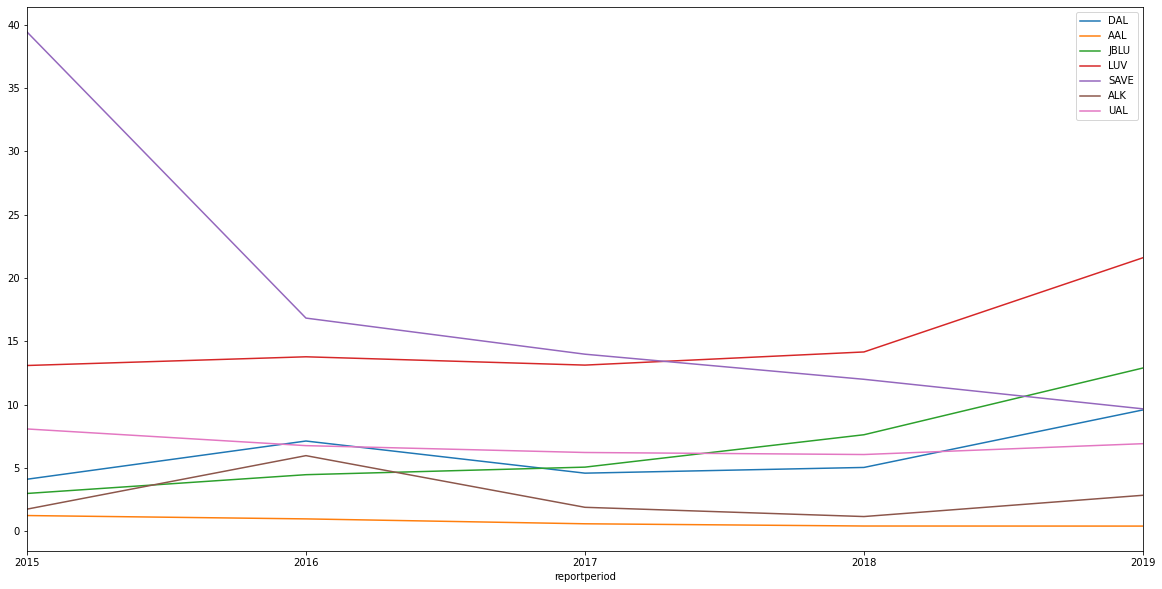

In [40]:
analyze_debt_cross(dfs,'cash_intexp')